# 12.1 모델 평가하기

다음은 머신러닝 프로젝트 수행 절차이다.  
<img src = "최적화1.jpg" width = "500" height = "500">

지금까지는 f를 근사계산하기 위해 입력을 넣었을 때 원하는 출력이 나오도록 손실 함수를 최소화 하는 입력 파라미터를 찾고자 하였다.  
즉, 우리의 목표는 데이터셋에 대한 손실 값을 최소화하는 것이었다.  
하지만 이 방향은 수집된 데이터에만 모델이 잘 작동하는 현상인 오버피팅에 빠질 수 있다.

### 1. 좋은 평가란?

모델을 실제 배포하고 나서 모델이 제대로 동작하지 않는 상황을 발견하는 것보다 미리 잘 준비된 테스트셋을 통해 객관적인 평가를 수행하는 것이 중요하다.  
테스트를 위한 데이터셋의 난이도 설정도 중요한 포인트이다.  
테스트 데이터셋을 단순히 수집된 데이터셋 중에서 임의로 고르기보단 적절한 수준의 샘플을 직접 엄선하여 구성하는 것이 좀 더 바람직하다.  

### 2. 정성평가와 정량평가

채점의 명확한 기준이 없거나 정답이 정해져 있지 않은 경우에는 정성평가를 수행하는 것이 가장 정확하다.  
정성평가란 : 실제 사람이 예측된 결과값을 채점하는 것이다.  

정량평가란 : 정성평가의 단점을 보완하기 위해 나온 평가방법으로, 잘 고안된 점수 채점 공식에 의해서 테스트 데이터셋 예측 결과값에 대한 채점을 진행한다.  
컴퓨터가 자동으로 진행하는 만큼 대량 평가 및 자동화가 가능하며, 비용과 시간측면에서 효율적이다.  

<img src = "오버피팅1.jpg" width = "500" height = "500">

### 3. 실무에서 평가가 진행되는 과정의 예

실무에서 평가를 진행한 경험을 간략하게 소개하면 다음과 같다.
1. 학습이 완료된 모델에 테스트 데이터셋을 넣어 추론을 수행한다.
2. 또한 동일한 테스트 데이터셋을 다른 베이스라인 모델에 넣어 추론을 수행한다. 이때 베이스라인 모델의 코드를 가지고 있을 수도 있지만 경쟁사 서비스와 같이 코드가 없는 경우에는 직접 서비스에 데이터를 넣어 결과를 얻어올 수 있다. 
3. 채점 기준이 모호한 경우에는 정성평가를 수행한다. 이때 중요한 것은 누가 어떤 예측 결과를 내놓았는지를 가리고 평가하는 블라인드 테스트를 수행해야 한다는 점이다. (블라인드가 아니면 객관성을 갖추지 못함.)
4. 미리 잘 정의된 정성평가 기준에 따라 평가가 완료가 되면 결과를 취합하여 보고한다.

작은 개성사항이 있는 모델에 대해서는 주로 정량평가를 통해 성능을 평가하고, 이후에 실제 서비스에 배포할 때 정성평가를 수행하는 것이 올바른 과정이다.

# 12.2 오버피팅이란?

### 1. 목표 수정

만약 데이터셋을 수집하는 과정에서 실수가 있거나, 편향이 생기면 어떻게 될까?  
그 데이터셋을 가지고 신경망이 학습했다면 어떻게 될까?  
그렇다면 실제 배포된 상황에서도 모델이 잘못된 정답을 뱉어낼 수 있다.  

우리의 최종 목표는 일반화 오차를 최소화하는 것이다.

### 2. 오버피팅과 언더피팅

오버피팅 : 학습 오차가 일반화 오차에 비해서 현격하게 낮아지는 현상.  
학습 데이터에 편향이나 노이즈가 있을 때 이것까지 모델이 학습함으로써 오히려 모델이 일반화를 수행하는데 방해되는 상태

언더피팅 : 모델이 충분히 데이터를 학습하지 못하여 학습 오차가 충분히 낮지 않은 상태

오버피팅과 언더피팅 여부를 통해 최종 목표에 잘 도달하고 있는지 확인할 수 있다.  
<img src = "오버피팅2.jpg" width = "500" height = "500">

왼쪽과 같이 선형 모델(e.g. 선형회귀)로 이 데이터를 모델링하고자 한다면 잘 동작하지 않을 것이다.  
선형 모델은 이 데이터를 학습하기에 너무 수용능력이 작다. 따라서 언더피팅이 발생한다.

반대로 오른쪽과 같이 너무 복잡한 형태의 함수로 근사계산하면 지나친 일반화가 이루어진 것이라고 볼 수 있다.

### 3. 검증 데이터셋

검증 데이터셋은 학습 데이터 일부를 임의로 나누어 만든다.  
검증 데이터셋이 학습 데이터셋과 같은 성질을 갖고 있다면, 모델은 검증 데이터셋에 대해서도 비슷한 손실 값을 가질 것이다.

이를 위해서 검증 데이터셋을 만든 후 이것을 학습하는 도중에 주기적으로 모델에 넣어 손실 값을 구함으로써 오버피팅 여부를 확인한다.  
보통 매 에포크마다 이 작업을 수행하며 이 과정을 검증과정이라 부른다.  

검증 과정에서 얻은 검증 데이터셋에 대한 손실 값을 "검증 손실값"이라 부른다.  
검증 데이터셋을 통해서는 최적화(학습)을 진행하지 않으며, 데이터셋을 나누는 과정에서 편향이 있어서는 안된다는 것이 중요하다.

### 4. 모델 학습 과정 정리

앞의 내용을 바탕으로 심청신경망(DNN)의 학습 과정을 도식화 하면 다음과 같다.
<img src = "오버피팅3.jpg" width = "1000" height = "1000">

한 에포크는 학습과정과 검증과정으로 구성되어 있으며 각각의 학습 과정과 검증 과정은 미니배치로 구성된 여러 이터레이션으로 구성되어 있다.  
검증 과정에서는 손실 값을 계산하지만 역전파 계산과 경사하강법의 수행이 없다는 것이 중요하다.

모델 최적화 과정에서는 손실 값이 들쑥날쑥할 수 있기 때문에 한 번 검증 손실 값이 낮아지지 못했다고 오버피팅이라 보긴 어렵다.  
따라서 모든 학습이 종료된 이후에 최소 검증 손실 값을 기록했던 에포크의 모델 가중치 파라미터를 복원하는 과정을 거친다.  
이 과정을 거치면 일반화 오차가 가장 낮은 모델을 선택할 수 있고, 오버피팅을 피할 수 있다.  
<img src = "오버피팅4.jpg" width = "500" height = "500">

모델 수용 능력은 충분하기 때문에 파란색 선을 계속해서 내려간다.  
학습 손실 값과 검증 손실 값 모두 단조 감소하기보다는 들쑥날쑥하게 움직이는 것을 볼 수 있다.  

# 12.3 테스트셋 구성하기

보통 3가지 데이터셋의 비율로 8:1:1 또는 6:2:2가 되도록 구성한다.
<img src = "오버피팅5.jpg" width = "500" height = "500">
학습 데이터셋을 통해 가중치 파라미터를 결정(학습)할 수 있으며, 검증 데이터셋과 테스트 데이터셋을 통해 오버피티과 같은 정합성 여부를 확인할 수 있다.  
하이퍼파라미터의 경우 경사하강법과 같은 최적화 방법을 통해 결정될 수 없기 때문에 사용자에 의해 손으로 결정되는 작업이 수반된다.  
대부분의 하이퍼파라미터들은 검증 데이터셋을 통해 결정되며 테스트셋을 통해서 검증을 수행할 수 있다.

# 12.4 데이터 나누기

### 1. 데이터 준비
이 장에서 배운 내용을 바탕으로 학습, 검증, 테스트 데이터를 잘 나누어 모델을 학습시키고 모델이 객관적으로 잘 학습되었는지 체크한다.

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

Target 열에 우리가 예측해야하는 출력값을 넣어준다.

In [76]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

캘리포니아 주택 데이터셋의 값을 파이토치 Float 텐서로 변환한다.  
입력 데이터를 x 변수에 슬라이싱 하여 할당하고 출력 데이터를 y변수에 슬라이싱 하여 할당한다.  

In [78]:
data = torch.from_numpy(df.values).float()

x = data[:, :-1]
y = data[:, -1:]

print(x.size(), y.size())

torch.Size([20640, 8]) torch.Size([20640, 1])


준비된 입출력을 임의로 학습, 검증, 테스트 데이터로 나눈다. 

In [79]:
# Train / Valid / Test ratio
ratios = [.6, .2, .2]

ratios에 담긴 값을 활용하여 실제 데이터셋에서 몇 개의 샘플들이 각각 학습, 검증, 테스트셋에 할당되어야 하는지 구할 수 있다.

In [80]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train %d / Valid %d / Test %d samples" % (train_cnt, valid_cnt, test_cnt))

Train 12384 / Valid 4128 / Test 4128 samples


이때 중요한 점은 앞에서 설정한 비율로 데이터셋을 나누되 임의로 샘플을 선정하여 진행해야 한다는 것이다. 
다음 코드를 통해 데이터셋의 랜덤 셔플링후 나누길르 수행한다.  
x와 y에 대해서 각각 랜덤 선택 작업을 수행하는 것이 아니라 쌍으로 짝지어 수행이 된다는 점이 중요하다.  
다음의 코드를 보면 데이터셋을 나누는 코드는 앞에서 나왔던 SGD에서 미니배치를 나누는 것과 상당히 유사하다.

In [81]:
indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim=0, index = indices)
y = torch.index_select(y, dim=0, index = indices)

x = list(x.split(cnts, dim =0))
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x,y) :
    print(x_i.size(), y_i.size())

torch.Size([12384, 8]) torch.Size([12384, 1])
torch.Size([4128, 8]) torch.Size([4128, 1])
torch.Size([4128, 8]) torch.Size([4128, 1])


이 작업이 끝나면 6:2:2의 비율대로 학습, 검증, 테스트셋이 나눠진 것을 확인할 수 있다.  
이제 학습에 들어가면 매 에포크마다 12,384개의 학습 샘플들을 임의로 섞어 미니배치들을 구성하여 학습 이터레이션을 돈다.

데이터셋 정규화작업을 수행한다.  
데이터셋을 피팅하는 작업을 수행해야 한다.  
표준 스케일링을 진행하기 위해서는 데이터셋의 각 열에 대해 평균과 표준편차를 구해야 한다.  
이 과정을 통해 데이터셋의 각 열의 분포를 추정하고 표준편차를 활용하여 표준정규분포로 변환한다.  

다음 코드를 보면 학습데이터인x[0]에 대해서 표준 스케일링을 피팅시키고, 이후에 해당 스케일러를 활용하여 학습(x[0]), 검증(x[1]), 테스트(x[2])데이터에 대해 정규화를 진행한다.  
이처럼 학습 데이터만을 활용하여 정규화를 진행하는 것은 매우 중요하다.

In [82]:
scaler = StandardScaler()
scaler.fit(x[0].numpy()) # You must fit with train data only.

x[0] = torch.from_numpy(scaler.transform(x[0].numpy())).float()
x[1] = torch.from_numpy(scaler.transform(x[1].numpy())).float()
x[2] = torch.from_numpy(scaler.transform(x[2].numpy())).float()

### 2. 학습 코드 구현

앞에서와 똑같이 nn.Sequential을 활용하여 모델을 선언하고, 아담 옵티마이저에 등록한다.

In [84]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y[0].size(-1)),
)

optimizer = optim.Adam(model.parameters())

In [85]:
n_epochs = 4000
batch_size = 256
print_interval = 100

매 에포크마다 학습이 끝날 때 검증 데이터셋을 똑같이 피드포워딩 하여 검증 데이터셋 전체에 대한 평균 손실 값을 구하고, 이전 에포크의 검증 손실 값과 비교하는 작업을 수행해야한다.  
현재 에포크의 검증 손실 값이 이전 에포크까지의 최저 검증 손실 값보다 크다면 이번 에포크의 모델을 따로 저장할 필요 없이 넘어가면 된다.  
다음 코드는 최저 검증 손실을 추적하기 위한  lowest_loss와 최저 검증 손실 값을 뱉어낸 모델을 저장하기 위한 변수 best_model을 미리 생성한다.  
이때 best_model에 단순히 현재 모델을 저장한다면 얇은 복사가 수행되어 주솟값이 저장되므로 깊은 복사를 통해 값 자체를 복사하여 저장해야한다.  
이를 위해서 copy 패키지의 deepcopy 함수를 불러온다.

In [86]:
from copy import deepcopy

lowest_loss = np.inf
best_mdel = None

early_stop = 100
lowest_epoch = np.inf

이전까지의 실습과 달라진 점은 바깥쪽 for 반복문의 후반부에 검증 작업을 위한 코드가 추가되었다는 것이다.  
새롭게 추가된 코드의 내용은 학습/검증 손실 값 히스토리를 저장하기 위한 train_history와 valid_history변수가 추가된 것.

In [89]:
train_history, valid_history = [], []

for i in range(n_epochs):
    # Shuffle before mibi-batch split.
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    # |x_| = (batch_size, input_dim)
    # |y_| = (batch_size, output_dim)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = x_.split(batch_size, dim=0)
    # |x_[i]| = (batch_size, input_dim)
    # |y_[i]| = (batch_size, output_dim)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        # |x_i| = |x_[i]|
        # |y_i| = |y_[i]|
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        optimizer = zero_grad()
        loss.backward()
        
        optimizer.step()
        train_loss += float(loss)
        
    train_loss = train_loss / len(x)

AttributeError: 'tuple' object has no attribute 'split'

In [102]:
for i in range(n_epochs) :
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index= indices)
    y_ = torch.index_select(y[0], dim=0, index= indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    train_loss, valid_loss = 0,0
    y_hat = []

    for x_i, y_i in zip(x_,y_) :
      y_hat_i = model(x_i)
      loss = F.mse_loss(y_hat_i, y_i)

      optimizer.zero_grad()
      loss.backward()

      optimizer.step()
      train_loss += float(loss)

    train_loss = train_loss/len(x_)
    
    with torch.no_grad():
        # You don't need to shuffle the validation set.
        # Only split is needed.
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
    
        valid_loss = 0
    
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.mse_loss(y_hat_i, y_i)
        
            valid_loss += loss
        
            y_hat += [y_hat_i]
        
    valid_loss = valid_loss / len(x_)

    # Log each loss to plot after training is done.
    train_history += [train_loss]
    valid_history += [valid_loss]

    if(i + 1) % print_interval == 0:
        print("Epoch %d: train loss=%.4e  valid loss=%.4e  lowest_loss=%.4e" % (i + 1, train_loss, valid_loss, lowest_loss))
    
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        # 'state_dict()' returns model weights as key-value.
        # Take a deep copy, if the valid loss is lowest ever.
        best_model = deepcopy(model.state_dict())
    else : 
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break
            
print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))

# Load best epoch's model.
model.load_state_dict(best_model)

Epoch 100: train loss=2.9827e-01  valid loss=3.0939e-01  lowest_loss=3.0683e-01
There is no improvement during last 100 epochs.
The best validation loss from epoch 11: 3.0683e-01


<All keys matched successfully>

학습과 달리 검증 작업은 역전파를 활용하여 학습을 수행하지 않는다.  
따라서 그래디언트를 계산할 필요가 없기 때문에 torch.no_grad 함수를 호출하여 with 내부에서 검증 작업을 진행한다.

In [97]:
# You need to declare to PYTORCH to stop build the computation graph.

with torch.no_grad():
    # You don't need to shuffle the validation set.
    # Only split is needed.
    x_ = x[1].split(batch_size, dim=0)
    y_ = y[1].split(batch_size, dim=0)
    
    valid_loss = 0
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        
        valid_loss += loss
        
        y_hat += [y_hat_i]
        
valid_loss = valid_loss / len(x_)

# Log each loss to plot after training is done.
train_history += [train_loss]
valid_history += [valid_loss]

if(i + 1) % print_interval == 0:
    print("Epoch %d: train loss=%.4e  valid loss=%.4e  lowest_loss=%.4e" % (i + 1, train_loss, valid_loss, lowest_loss))

Epoch 4000: train loss=2.9800e-01  valid loss=3.1031e-01  lowest_loss=inf


기존 최소 손실 값 변수 lowest_loss와 현재 검증 손실 값 valid_loss를 비교하여 최소 손실 값이 갱신 될 경우에 현재 에포크의 모델을 저장한다.  
조기 종료 파라미터 또한 하이퍼파라미터이다.

### 3. 손실 곡선 확인

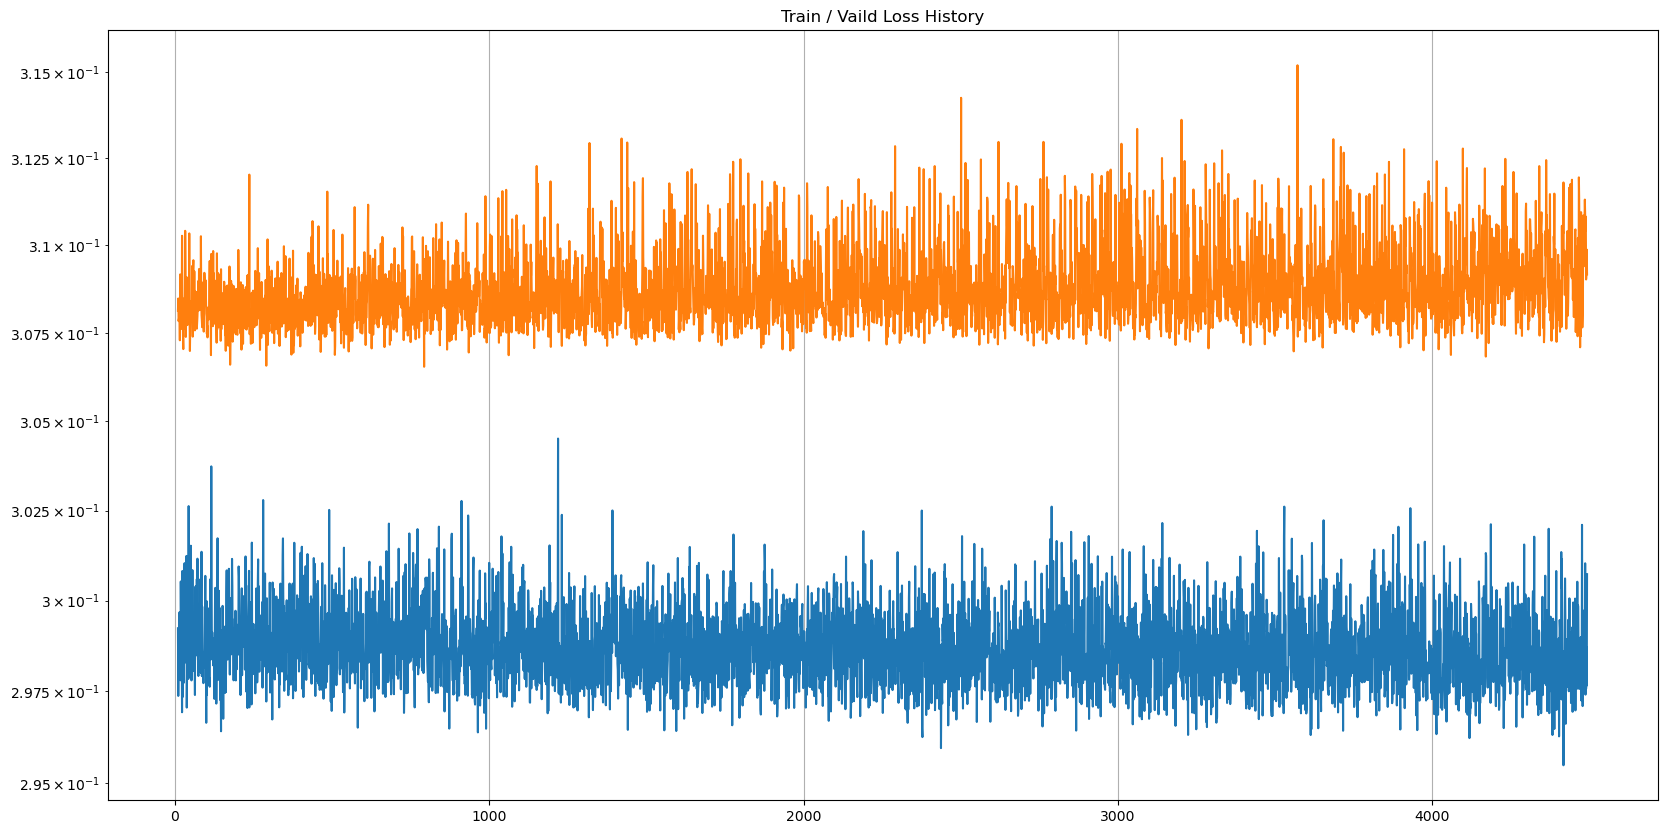

In [104]:
plot_from = 10

plt.figure(figsize=(20,10))
plt.grid(True)
plt.title("Train / Vaild Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()